In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [43]:
color_image = 'G:\My Drive\Sem-7\Digital Image Processing\LAB-2\color image.jpeg'

In [44]:
image1 = Image.open(color_image).convert('L')
image2 = Image.open(color_image)

In [45]:
histogram_before_image1 = image1.histogram()
r_hist, g_hist, b_hist = image2.split()
histogram_before_image2 = np.concatenate((r_hist.histogram(), g_hist.histogram(), b_hist.histogram()))

In [46]:
def plot_histogram(image,histogram,title,y_range=None):
    
    fig,axs = plt.subplots(1,2,figsize=(8,5))
    
    num_bins = 256 if len(histogram) == 256 else 256 * 3
    
    axs[1].bar(range(num_bins),histogram,color='blue',alpha=0.7)
    axs[1].set_xlabel('Pixel Value')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of '+title)
    axs[1].grid(True)
    
    axs[0].imshow(image)
    axs[0].set_title('Image of '+title)
    axs[0].axis('off')
    
    if y_range is not None:
        axs[1].set_ylim(y_range)
    
    plt.tight_layout()
    plt.show()

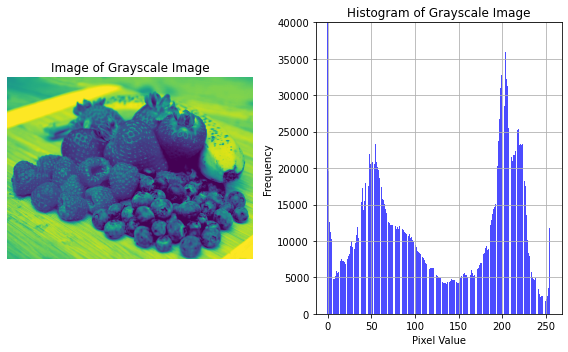

In [47]:
plot_histogram(image1, histogram_before_image1, 'Grayscale Image',y_range=(0,40000))

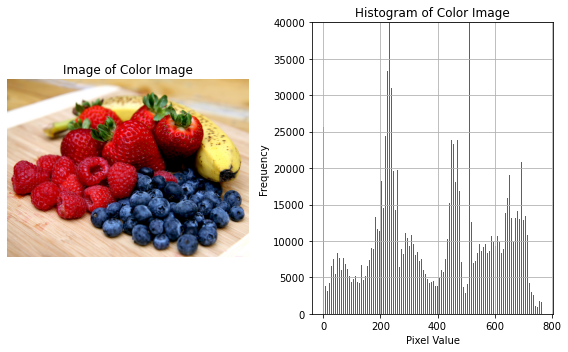

In [48]:
plot_histogram(image2, histogram_before_image2, 'Color Image',y_range=(0,40000))

In [36]:
normalized_histogram_before_image1 = np.array(histogram_before_image1) / sum(histogram_before_image1)
normalized_histogram_before_image2 = np.concatenate((
    np.array(r_hist.histogram()) / sum(r_hist.histogram()),
    np.array(g_hist.histogram()) / sum(g_hist.histogram()),
    np.array(b_hist.histogram()) / sum(b_hist.histogram())
))

In [38]:
def normalize_image(image):

    image_array = np.array(image, dtype=np.uint8)
    normalized_image_array = (image_array - np.min(image_array)) * (255 / (np.max(image_array) - np.min(image_array)))
    
    normalized_image = Image.fromarray(normalized_image_array.astype(np.uint8))
    
    return normalized_image

In [49]:
normalized_grayscale = normalize_image(image1)
normalized_color = normalize_image(image2)

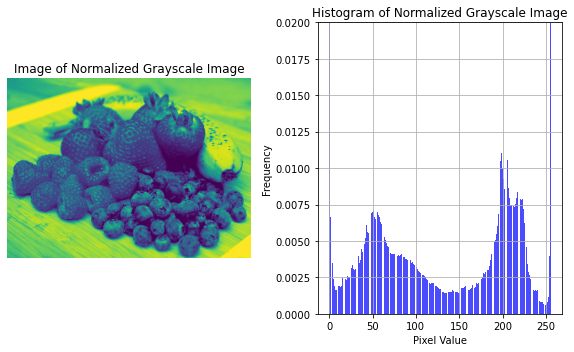

In [53]:
plot_histogram(normalized_grayscale, normalized_histogram_before_image1, 'Normalized Grayscale Image',y_range=(0,0.02))

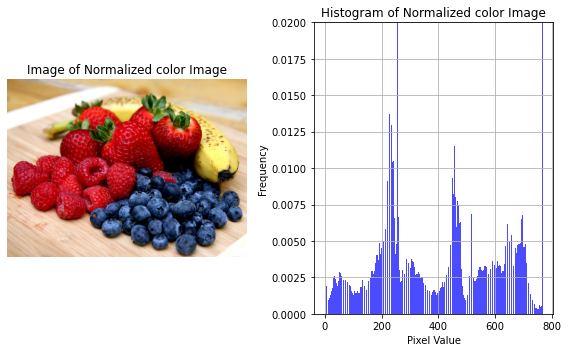

In [52]:
plot_histogram(normalized_color, normalized_histogram_before_image2, 'Normalized color Image',y_range=(0,0.02))